In [18]:
#!pip install numpy pandas scikit-learn seaborn matplotlib statsmodels scipy



In [19]:
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd


# 2. Modelo de regresi√≥n lineal multiple

La regresi√≥n lineal m√∫ltiple es una extensi√≥n de la regresi√≥n lineal simple. Mientras que en la regresi√≥n lineal simple se modela la relaci√≥n entre una variable dependiente ùëå y una √∫nica variable independiente ùëã, en la regresi√≥n lineal m√∫ltiple se modela la relaci√≥n entre ùëå y varias variables independientes X1, ùëã2, ..., ùëãùëõ

### Diferencias clave entre la regresi√≥n lineal simple y m√∫ltiple
**N√∫mero de variables independientes:** 

Regresi√≥n lineal simple: Tiene una sola variable independiente. La ecuaci√≥n es de la forma:

ùëå=ùõΩ0+ùõΩ1ùëã+ùúÄ

Regresi√≥n lineal m√∫ltiple: Tiene varias variables independientes. La ecuaci√≥n general se ampl√≠a a:

ùëå=ùõΩ0+ùõΩ1ùëã1+ùõΩ2ùëã2+‚ãØ+ùõΩùëõùëãùëõ+ùúÄ

Donde 
Y es la variable dependiente,
ùëã1, ùëã2,‚Ä¶,ùëãùëõ son las variables independientes, 
ùõΩ0 es el intercepto, 
ùõΩ1, ùõΩ2, ‚Ä¶, ùõΩùëõ Son los coeficientes de regresi√≥n de cada variable independiente, 
Œµ es el t√©rmino de error.

Complejidad y c√°lculo:

Simple: Solo se estima un coeficiente de pendiente y un intercepto.
M√∫ltiple: Se estiman varios coeficientes de regresi√≥n (uno para cada variable independiente) y un intercepto. Esto aumenta la complejidad de los c√°lculos y, en algunos casos, puede requerir m√©todos m√°s avanzados de optimizaci√≥n y an√°lisis.
Interpretaci√≥n de coeficientes:

Simple: El coeficiente ùõΩ1 representa el cambio esperado en ùëå por cada unidad de cambio en ùëã.
M√∫ltiple: Cada coeficiente ùõΩùëñ representa el cambio esperado en ùëå cuando ùëãùëñ cambia una unidad, manteniendo constantes las dem√°s variables independientes. Esto se llama interpretaci√≥n "ceteris paribus" y es importante en modelos con m√∫ltiples variables, donde las variables independientes pueden interactuar o influenciarse entre s√≠.

Ajuste y predicci√≥n:

M√∫ltiple: En general, la regresi√≥n m√∫ltiple permite capturar m√°s variabilidad de la variable dependiente Y al considerar m√∫ltiples factores, lo que puede mejorar el ajuste del modelo (reflejado en un valor ùëÖ2 mayor).

Simple: La variabilidad en Y solo se explica por una variable independiente, lo que a veces limita el ajuste del modelo.

Multicolinealidad:

M√∫ltiple: La presencia de m√∫ltiples variables puede causar multicolinealidad, donde algunas variables independientes est√°n altamente correlacionadas entre s√≠. Esto puede hacer que los coeficientes sean inestables y dif√≠ciles de interpretar. El nombre viene de linealidad y de co en relacion a que la variable dependiente es afectada por dos o mas variables que tienen relaci√≥n entre s√≠. POr ejemplo La multicolinealidad surge porque las variables independientes (educaci√≥n, salud, experiencia laboral, y red de contactos) est√°n correlacionadas entre s√≠ y con el ingreso, lo cual dificulta distinguir el efecto espec√≠fico de cada variable sobre el ingreso.

Simple: No existe el problema de multicolinealidad porque solo hay una variable independiente.

* "Estatura_Padres": "Estatura promedio de los padres"
* "Estatura_Hijos": "Estatura de los hijos"
* "Ejercicio": "Cantidad de ejercicio f√≠sico en horas promedio por semana"
* "Alimentacion": "Calidad de la alimentaci√≥n en una escala de 1 a 10"
* "Sueno": "Promedio de horas de sue√±o por noche"
* "Nivel_Socioeconomico": "Nivel socioecon√≥mico en una escala de 1 a 5"


In [20]:
# Establecer la semilla para reproducibilidad
np.random.seed(123)

# Generar datos simulados para estatura de padres e hijos
estatura_padres = np.random.normal(loc=170, scale=10, size=100)
estatura_hijos = 50 + 0.8 * estatura_padres + np.random.normal(loc=0, scale=5, size=100)

# Crear variables de control con correlaciones moderadas con la estatura de los hijos
# Ejercicio: Relaci√≥n baja con la estatura de los hijos m√°s un t√©rmino aleatorio
ejercicio = 0.05 * estatura_hijos + np.random.normal(loc=3, scale=1, size=100)

# Alimentaci√≥n: Relaci√≥n baja con la estatura de los hijos m√°s un t√©rmino aleatorio
alimentacion = 0.02 * estatura_hijos + np.random.normal(loc=7, scale=1.5, size=100)

# Sue√±o: Relaci√≥n leve con la estatura de los hijos m√°s un t√©rmino aleatorio
sueno = 0.03 * estatura_hijos + np.random.normal(loc=8, scale=1, size=100)

# Nivel Socioecon√≥mico: Relaci√≥n baja con la estatura de los hijos m√°s un t√©rmino aleatorio
nivel_socioeconomico = 0.01 * estatura_hijos + np.random.normal(loc=3, scale=1, size=100)

# Crear el DataFrame con todas las variables
df_estatura = pd.DataFrame({
    'Estatura_Padres': estatura_padres,
    'Estatura_Hijos': estatura_hijos,
    'Ejercicio': ejercicio,
    'Alimentacion': alimentacion,
    'Sueno': sueno,
    'Nivel_Socioeconomico': nivel_socioeconomico
})

# Calcular el rango intercuart√≠lico (IQR) y filtrar valores at√≠picos
def eliminar_outliers(df):
    df_limpio = df.copy()
    for columna in df.columns:
        # Calcular Q1 (25%) y Q3 (75%) y el IQR
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determinar l√≠mites para valores no at√≠picos
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Filtrar outliers
        df_limpio = df_limpio[(df_limpio[columna] >= limite_inferior) & (df_limpio[columna] <= limite_superior)]
    
    return df_limpio

# Aplicar la funci√≥n de eliminaci√≥n de outliers
df_estatura = eliminar_outliers(df_estatura)

# Mostrar el DataFrame limpio y revisar la correlaci√≥n
print("\nCorrelaci√≥n despu√©s de limpiar los datos:")
print(df_estatura.corr())

# Mostrar el DataFrame y revisar la correlaci√≥n
df_estatura


Correlaci√≥n despu√©s de limpiar los datos:
                      Estatura_Padres  Estatura_Hijos  Ejercicio  \
Estatura_Padres              1.000000        0.866805   0.342417   
Estatura_Hijos               0.866805        1.000000   0.426259   
Ejercicio                    0.342417        0.426259   1.000000   
Alimentacion                -0.005546        0.076355   0.269872   
Sueno                        0.235137        0.199836   0.157258   
Nivel_Socioeconomico         0.379356        0.363785   0.244064   

                      Alimentacion     Sueno  Nivel_Socioeconomico  
Estatura_Padres          -0.005546  0.235137              0.379356  
Estatura_Hijos            0.076355  0.199836              0.363785  
Ejercicio                 0.269872  0.157258              0.244064  
Alimentacion              1.000000  0.192503             -0.054296  
Sueno                     0.192503  1.000000              0.126207  
Nivel_Socioeconomico     -0.054296  0.126207              1.0000

Estatura_Padres  Estatura_Hijos  Ejercicio  Alimentacion      Sueno  \
0        159.143694      180.525229  12.729572     11.758087  14.949847   
1        179.973454      184.089324  11.606361      9.438303  12.992766   
2        172.829785      191.825151  14.791960      9.847776  13.263782   
3        154.937053      186.941162  13.035355     11.655509  12.299070   
4        164.213997      181.248068  12.056096     10.408941  13.428782   
..              ...             ...        ...           ...        ...   
95       180.311145      178.093641  12.600469      9.950604  13.910689   
96       159.154321      175.976989  13.674650     10.082280  13.792293   
97       156.365285      174.537974  12.142593     10.858829  13.209217   
98       173.794006      187.328896  12.526989     10.493938  13.931448   
99       166.208236      181.876857  12.913603     11.003578  13.314255   

    Nivel_Socioeconomico  
0               5.557286  
1               4.910534  
2               4.652806  
3               5.798996  
4               6.073302  
..                   ...  
95              5.056278  
96              4.129152  
97              3.351005  
98              5.785977  
99              3.545198  

[95 rows x 6 columns]

In [21]:
df_estatura.to_csv('df_estatura.csv', index=False)

# Pasos
1. Como en el escenario anterior, hay que ver si la variable tiene una relaci√≥n lineal (exploraci√≥n visual y matriz de correlaci√≥n), si la tiene comprobar que no hay multicolinealidad. 
2. Ajustar modelo y obtener
3. Visualizar los valores predichos vs los valores reales para tener una idea visual del ajuste. 

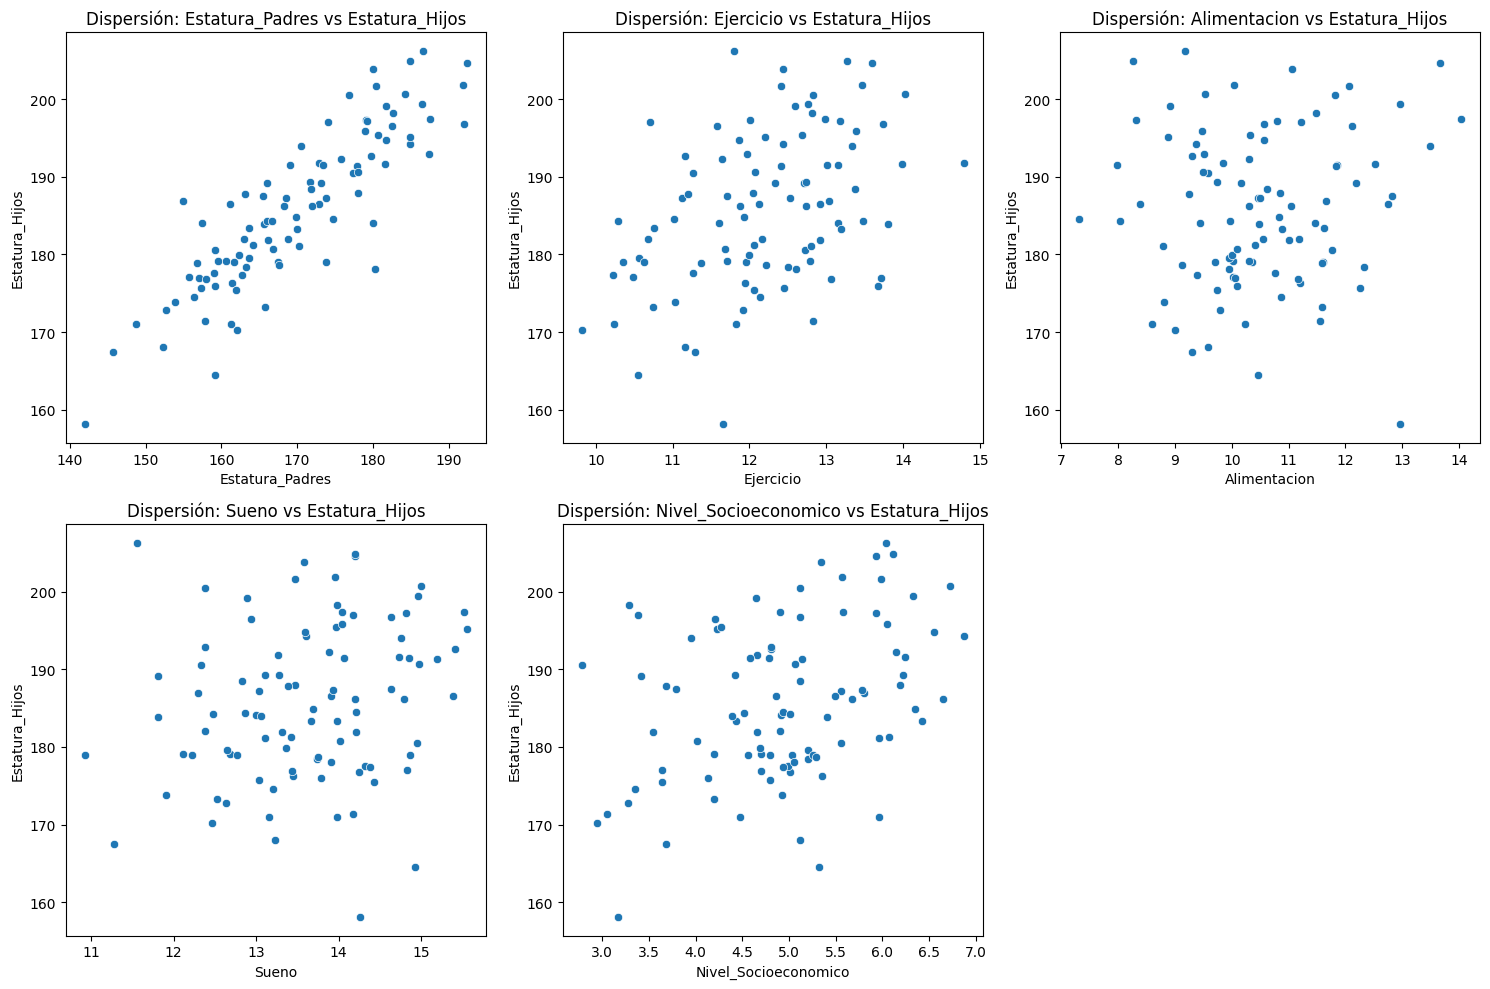

In [22]:
# Graficar dispersi√≥n de cada variable independiente con respecto a la variable dependiente (Estatura_Hijos)
variables_independientes = ['Estatura_Padres', 'Ejercicio', 'Alimentacion', 'Sueno', 'Nivel_Socioeconomico']
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_independientes, 1):
    plt.subplot(2, 3, i)  # Configuraci√≥n de la cuadr√≠cula de gr√°ficos
    sns.scatterplot(data=df_estatura, x=var, y='Estatura_Hijos')
    plt.title(f"Dispersi√≥n: {var} vs Estatura_Hijos")
    plt.xlabel(var)
    plt.ylabel('Estatura_Hijos')
plt.tight_layout()
plt.show()

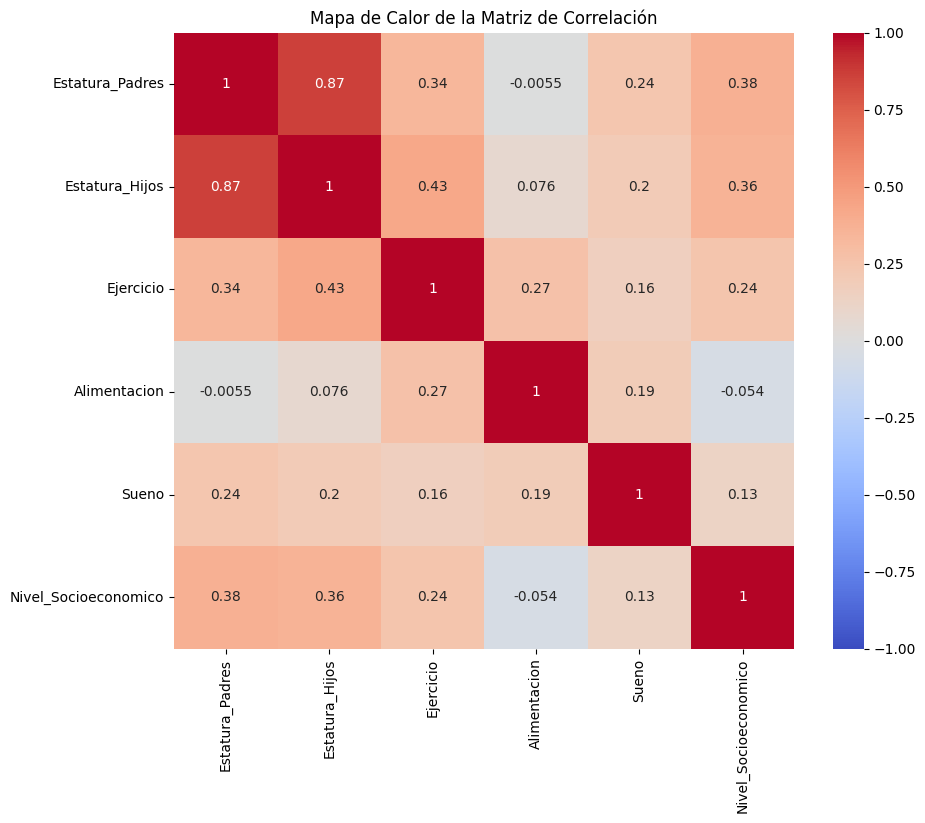

In [23]:
# Paso 1: Gr√°fico de Correlaci√≥n
plt.figure(figsize=(10, 8))
sns.heatmap(df_estatura.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Mapa de Calor de la Matriz de Correlaci√≥n")
plt.show()



In [24]:
# Paso 2: C√°lculo del VIF
X = df_estatura[variables_independientes]
X = sm.add_constant(X)  # Agrega el intercepto para el c√°lculo del VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Factor de Inflaci√≥n de Varianza (VIF):")
print(vif_data)



Factor de Inflaci√≥n de Varianza (VIF):
               Variable         VIF
0                 const  407.334098
1       Estatura_Padres    1.321027
2             Ejercicio    1.267001
3          Alimentacion    1.142466
4                 Sueno    1.105973
5  Nivel_Socioeconomico    1.203471


C√°lculo del VIF (Factor de Inflaci√≥n de Varianza):

Para detectar multicolinealidad, calcula el VIF para cada variable independiente.
Un valor de VIF superior a 5 (o en algunos casos, 10) sugiere alta multicolinealidad y podr√≠a ser conveniente eliminar o combinar esas variables, ya que podr√≠an redundar en la explicaci√≥n de la variabilidad de Estatura_Hijos.


VIF < 5: Generalmente, no hay problema de multicolinealidad.

VIF > 5: Existe cierta multicolinealidad, y deber√≠as investigar m√°s.

VIF > 10: Indica una alta multicolinealidad, y podr√≠a ser recomendable eliminar o transformar la variable.

In [25]:
# Paso 3: Regresi√≥n M√∫ltiple y R-cuadrado ajustado
y = df_estatura['Estatura_Hijos']
modelo = sm.OLS(y, X).fit()  # Ajuste del modelo con statsmodels
print("\nResumen del modelo de regresi√≥n m√∫ltiple:")
print(modelo.summary())




Resumen del modelo de regresi√≥n m√∫ltiple:
                            OLS Regression Results                            
Dep. Variable:         Estatura_Hijos   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     60.76
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           3.24e-27
Time:                        18:55:07   Log-Likelihood:                -282.52
No. Observations:                  95   AIC:                             577.0
Df Residuals:                      89   BIC:                             592.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

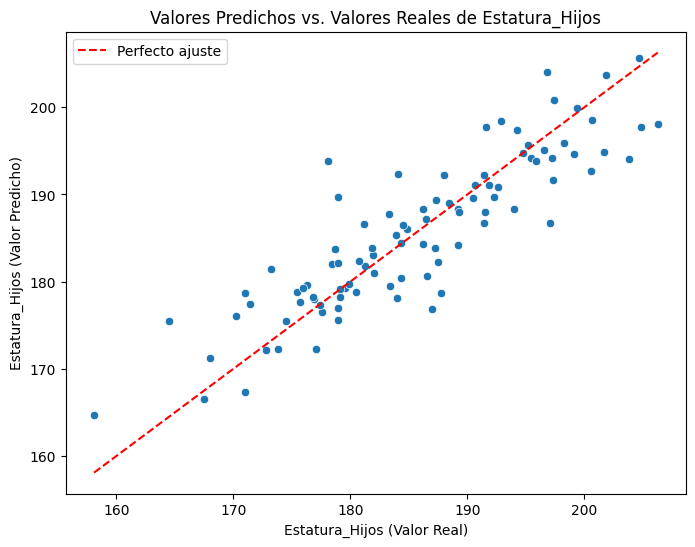

In [26]:
# Obtener los valores predichos usando el modelo ajustado
y_pred = modelo.predict(X)  # X es el DataFrame de las variables independientes

#a√±adir los valores predichos al DataFrame original para visualizaci√≥n
df_estatura['Estatura_Hijos_Pred'] = y_pred

# Gr√°fico de valores predichos vs. valores reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_estatura['Estatura_Hijos'], y=df_estatura['Estatura_Hijos_Pred'])
plt.plot([df_estatura['Estatura_Hijos'].min(), df_estatura['Estatura_Hijos'].max()],
         [df_estatura['Estatura_Hijos'].min(), df_estatura['Estatura_Hijos'].max()],
         color='red', linestyle='--', label='Perfecto ajuste')

# Etiquetas y t√≠tulo
plt.xlabel('Estatura_Hijos (Valor Real)')
plt.ylabel('Estatura_Hijos (Valor Predicho)')
plt.title('Valores Predichos vs. Valores Reales de Estatura_Hijos')
plt.legend()

plt.show()

## Evaluaci√≥n

1. Linealidad ya la hemos explorado y comprobado. Si no de entrada no habr√≠amos corrido el modelo

2. Independencia de errores (respecto a s√≠ mismos)

Estad√≠stico de Durbin-Watson: 1.9384262764703195


Text(0.5, 1.0, 'Gr√°fico de Residuos vs. Valores Predichos')

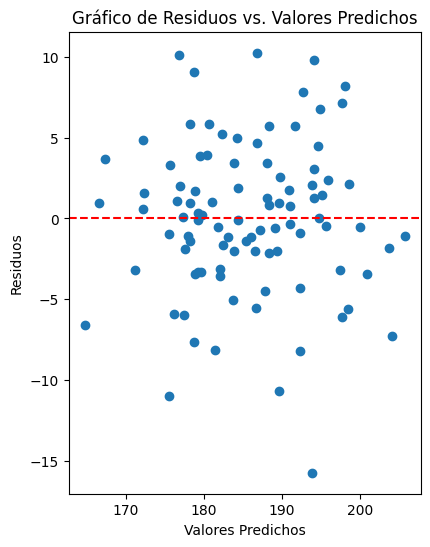

In [27]:

# Calcular el estad√≠stico de Durbin-Watson
dw_stat = durbin_watson(modelo.resid)
print(f"Estad√≠stico de Durbin-Watson: {dw_stat}")

# Gr√°fico de residuos vs. valores predichos
plt.figure(figsize=(10, 6))

# Residuos vs Valores Predichos
plt.subplot(1, 2, 1)
plt.scatter(modelo.fittedvalues, modelo.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gr√°fico de Residuos vs. Valores Predichos')




3. Homocedasticidad

In [28]:
# Realizar la Prueba de Breusch-Pagan
lm_stat, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(modelo.resid, modelo.model.exog)
print("Prueba de Breusch-Pagan para Homocedasticidad:")
print(f"LM Statistic: {lm_stat}, p-valor LM: {lm_pvalue}")
print(f"F-Statistic: {fvalue}, p-valor F: {f_pvalue}")



Prueba de Breusch-Pagan para Homocedasticidad:
LM Statistic: 3.8060604758322447, p-valor LM: 0.577662659095504
F-Statistic: 0.7428988902476326, p-valor F: 0.5933936761044349


En la regresi√≥n m√∫ltiple, hay m√°s detalles (como el estad√≠stico F) porque el modelo considera varias variables independientes, y esta informaci√≥n adicional puede ser √∫til.
En la regresi√≥n simple, el resultado se simplifica al dar el estad√≠stico LM y el p-valor para probar homocedasticida

4. Normalidad de los residuos

Resultados de la Prueba de Shapiro-Wilk para los residuos:
Estad√≠stico de Shapiro-Wilk: 0.9851607290359714
p-valor de Shapiro-Wilk: 0.3613882628338005


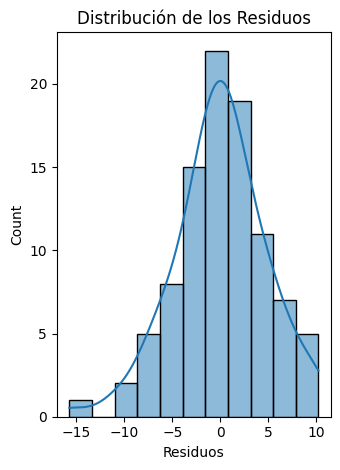

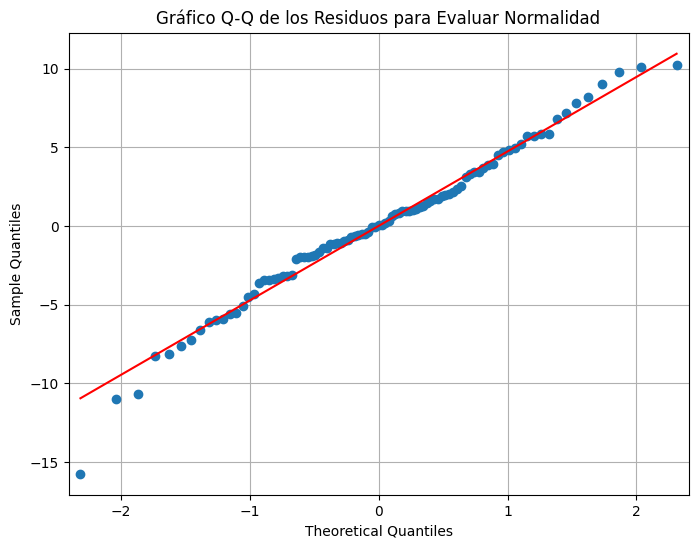

In [29]:
# Prueba de Shapiro-Wilk para los residuos
shapiro_stat, shapiro_pvalue = stats.shapiro(modelo.resid)
print("Resultados de la Prueba de Shapiro-Wilk para los residuos:")
print(f"Estad√≠stico de Shapiro-Wilk: {shapiro_stat}")
print(f"p-valor de Shapiro-Wilk: {shapiro_pvalue}")

# Histograma de los residuos para verificar normalidad
plt.subplot(1, 2, 2)
sns.histplot(modelo.resid, kde=True)
plt.xlabel('Residuos')
plt.title('Distribuci√≥n de los Residuos')

plt.tight_layout()
plt.show()
# Gr√°fico Q-Q
plt.figure(figsize=(8, 6))
sm.qqplot(modelo.resid, line='s', ax=plt.gca())
plt.title("Gr√°fico Q-Q de los Residuos para Evaluar Normalidad")
plt.grid(True)
plt.show()



5. Multicolinealidad. Se hizo antes

## Modelo en DC

In [30]:
# Definir variables independientes y dependiente
X = df_estatura[['Estatura_Padres', 'Ejercicio', 'Alimentacion', 'Sueno', 'Nivel_Socioeconomico']]
y = df_estatura['Estatura_Hijos']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo en el conjunto de entrenamiento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)


# Imprimir los coeficientes del modelo
y = df_estatura['Estatura_Hijos']
modelo_split = sm.OLS(y_train, X_train).fit()  # Ajuste del modelo con statsmodels
print("\nResumen del modelo de regresi√≥n m√∫ltiple tras dividir datos:")
print(modelo_split.summary())


y = df_estatura['Estatura_Hijos']
modelo = sm.OLS(y, X).fit()  # Ajuste del modelo con statsmodels
print("\nResumen del modelo de regresi√≥n m√∫ltiple sin dividir:")
print(modelo.summary())


Resumen del modelo de regresi√≥n m√∫ltiple tras dividir datos:
                                 OLS Regression Results                                
Dep. Variable:         Estatura_Hijos   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.716e+04
Date:                Fri, 07 Feb 2025   Prob (F-statistic):                   6.19e-108
Time:                        18:55:08   Log-Likelihood:                         -235.20
No. Observations:                  76   AIC:                                      480.4
Df Residuals:                      71   BIC:                                      492.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t   

Podemos notar que los resultados son distintos. Tiene que ver con el sampleo. 

In [31]:
# Calcular m√©tricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Error Cuadr√°tico Medio (MSE) en el conjunto de prueba: {mse:.2f}")
print(f"Coeficiente de Determinaci√≥n (R^2) en el conjunto de prueba: {r2:.2f}")

Error Cuadr√°tico Medio (MSE) en el conjunto de prueba: 19.77
Coeficiente de Determinaci√≥n (R^2) en el conjunto de prueba: 0.77


MSE eval√∫a la precisi√≥n general de las predicciones del modelo en comparaci√≥n con los valores reales, mientras que el error est√°ndar eval√∫a la precisi√≥n de los coeficientes del modelo.Cada valor predicho se aleja en promedio 3 unidades del valor real

## Despliegue

In [32]:
# Guardar el modelo entrenado en un archivo .pkl
with open('modelo_entrenado_multiple.pkl', 'wb') as file:
    pickle.dump(modelo_split, file)

print("Modelo exportado exitosamente en 'modelo_entrenado_multiple.pkl'")


Modelo exportado exitosamente en 'modelo_entrenado_multiple.pkl'


In [33]:
from flask import Flask, render_template, request
import pickle
import numpy as np

# Cargar el modelo desde el archivo .pkl
with open('modelo_entrenado_multiple.pkl', 'rb') as file:
    modelo = pickle.load(file)

# Inicializa la aplicaci√≥n Flask
app = Flask(__name__)

# Ruta principal para la p√°gina de inicio
@app.route('/', methods=['GET', 'POST'])
def index():
    resultado = None
    if request.method == 'POST':
        try:
            # Obtener los valores ingresados por el usuario
            estatura_padres = float(request.form.get('estatura_padres'))
            ejercicio = float(request.form.get('ejercicio'))
            alimentacion = float(request.form.get('alimentacion'))
            sueno = float(request.form.get('sueno'))
            nivel_socioeconomico = float(request.form.get('nivel_socioeconomico'))

            # Crear el array de caracter√≠sticas para la predicci√≥n
            entrada = np.array([[estatura_padres, ejercicio, alimentacion, sueno, nivel_socioeconomico]])

            # Realizar la predicci√≥n usando el modelo cargado
            estatura_hijo_predicha = modelo.predict(entrada)[0]
            resultado = f"Predicci√≥n de estatura del hijo: {estatura_hijo_predicha:.2f} cm"
        except ValueError:
            resultado = "Por favor, ingresa valores num√©ricos v√°lidos para todas las variables."
    
    # Renderizar el template HTML con el resultado
    return render_template('index_multiple.html', resultado=resultado)

# Ejecutar la aplicaci√≥n
if __name__ == '__main__':
    app.run(debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
